In [0]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [87]:
# Importacion de bibliotecas

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd
import glob
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import scipy.stats as ss
from sklearn.svm import SVC


# Funciones 
def displaydf(dataframe, cols = None, rows = 54):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

    
#! git clone https://bitbucket.org/lidiiiaasanchez//content/drive/My Drive/Colab Notebooks.git
#import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/funcionesSepsis.ipynb')
#from funcionesSepsis import *

In [205]:
# Cargamos fichero con los datos preprocesados
clean_patients = pd.read_csv("C:/Users/mgsanchez/Desktop/URJC/PMD/proyecto/loop1/CleanPatients_3.csv")
del clean_patients[("Unnamed: 0")] #Borramos columna extra 
display(clean_patients)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Outcome,IdPaciente
0,95.0,90.5,36.44,121.0,80.0,63.0,17.0,0.0,-3.000000,24.555556,...,126.769231,27.92,1,0.0,0.0,-0.03,13,0,0,0
1,108.0,97.0,37.72,120.0,75.0,59.0,50.0,0.0,1.052632,31.608696,...,89.956522,27.92,1,0.0,0.0,-0.03,71,0,0,0
2,117.0,100.0,38.11,145.0,88.0,67.0,26.0,0.0,1.800000,26.920000,...,249.240000,27.92,1,0.0,0.0,-0.03,142,0,0,0
3,118.0,98.5,38.00,128.5,88.0,113.0,23.5,0.0,2.500000,27.760000,...,281.720000,27.92,1,0.0,0.0,-0.03,149,0,0,0
4,113.0,100.0,37.61,113.5,68.0,61.0,34.0,0.0,3.000000,32.500000,...,189.000000,27.92,1,0.0,0.0,-0.03,166,0,0,0
5,130.0,98.0,38.72,104.0,75.0,61.0,31.0,0.0,8.166667,34.090909,...,242.400000,27.92,1,0.0,0.0,-0.03,176,0,0,0
6,119.0,95.0,38.44,96.0,74.0,62.0,30.0,0.0,8.000000,34.272727,...,257.200000,27.92,1,0.0,0.0,-0.03,178,0,0,0
7,122.0,98.0,38.67,132.0,97.0,78.0,21.0,0.0,8.166667,34.636364,...,286.800000,27.92,1,0.0,0.0,-0.03,182,0,0,0
8,114.0,100.0,37.78,118.0,88.0,69.0,44.0,0.0,9.000000,34.666667,...,323.800000,27.92,1,0.0,0.0,-0.03,187,0,0,0
9,125.0,96.0,38.11,91.0,69.0,55.0,18.0,0.0,9.000000,33.333333,...,353.400000,27.92,1,0.0,0.0,-0.03,191,0,0,0


In [206]:
# Visualizamos fichero
list_index=range(1, len(clean_patients)+1)
clean_patients['index_list']=list_index
split_train_len=int(0.75*len(clean_patients)) #70% conjunto train

train=clean_patients.iloc[0:split_train_len,:]
test=clean_patients.iloc[split_train_len:,:]

train=train.sample(frac=1)
test=test.sample(frac=1)

print(len(test))


144


# División en conjuntos train y test de los datos 

In [207]:
# Dividimos entre las variables que consideramos entradas y la salida

X_train = train[["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente",'index_list']]
X_test = test[["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente",'index_list' ]]
y_train = train[["Outcome",'index_list']]
y_test = test[["Outcome",'index_list']]

print(len(y_train))

432


# Estandarización de los datos

In [208]:
aux=clean_patients.iloc[0:split_train_len,:] #Auxiliar  

scaler = preprocessing.StandardScaler().fit(X_train) #Estandarizamos los subconjuntos teniendo en cuenta que para el test usaremos la media y desviación tipica de train 

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_transformed_no_scaled_id=pd.DataFrame(X_train_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente",'index_list'])

X_test_transformed_no_scaled_id=pd.DataFrame(X_test_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente",'index_list'])


#Para evitar normalización de IdPaciente
X_train_transformed_no_id=X_train_transformed_no_scaled_id.iloc[:,0:40] #Incluimos las columnas estandarizadas salvo IdPaciente
X_train_id=X_train[["IdPaciente",'index_list']] #La guardamos aparte sin normalizar
X_train_transformed=X_train_transformed_no_id.join(X_train_id) #Juntamos las variables normalizadas más el IdPaciente original

X_test_transformed_no_id=X_test_transformed_no_scaled_id.iloc[:,0:40]
X_test_id=X_train[["IdPaciente",'index_list']]
X_test_transformed=X_test_transformed_no_id.join(X_train_id)



C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Búsqueda de parámetros libres óptimos

## Parámetro K

In [209]:
k_values = range(1,40,2) #Rango de valores de k
cv_k_scores=[] 

#Bucle para definir el paciente para validación
for i in range(len(X_train_transformed)/24):
    train_cross_val=X_train_transformed[X_train_transformed['IdPaciente']!=i] #Conjunto de pacientes train
    test_cross_val=X_train_transformed[X_train_transformed['IdPaciente']==i] #Paciente para conjunto de validacipn
    
    #Empleamos auxiliar para obtener posteriormente el IdPaciente asociado al Outcome
    patients_train_cross_val=aux[aux['IdPaciente']!=i] 
    y_train_cross_val=patients_train_cross_val['Outcome'] 
    patients_test_cross_val=aux[aux['IdPaciente']==i]
    y_test_cross_val=patients_test_cross_val['Outcome']
    
    #Construimos modelo
    k_scores=[]
    
    for f in k_values:
        neigh = KNeighborsClassifier(n_neighbors=f) #Van pasando los diferentes valores de k
        neigh.fit(train_cross_val,y_train_cross_val)
        score=neigh.score(test_cross_val,y_test_cross_val)
        k_scores.append(score) #Array con scores
    cv_k_scores.append(k_scores) #Array de arrays de scores

print(len(cv_k_scores), "arrays de", len(k_scores), "scores cada uno")

(18, 'arrays de', 20, 'scores cada uno')


In [213]:
for i in range(2):
    train_cross_val=X_train_transformed[X_train_transformed['IdPaciente']!=i] #Conjunto de pacientes train
    test_cross_val=X_train_transformed[X_train_transformed['IdPaciente']==i] #Paciente para conjunto de validacipn
    print(train_cross_val["IdPaciente" ], test_cross_val["IdPaciente" ]) 

(24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      2
49      2
50      2
51      2
52      2
53      2
       ..
402    16
403    16
404    16
405    16
406    16
407    16
408    17
409    17
410    17
411    17
412    17
413    17
414    17
415    17
416    17
417    17
418    17
419    17
420    17
421    17
422    17
423    17
424    17
425    17
426    17
427    17
428    17
429    17
430    17
431    17
Name: IdPaciente, Length: 408, dtype: int64, 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: IdPaciente, dtype: int64)
(0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0

[0.07638888888888888, 0.0810185185185185, 0.06944444444444445, 0.06712962962962961, 0.0625, 0.07870370370370368, 0.0625, 0.0625, 0.06481481481481481, 0.06018518518518518, 0.06018518518518518, 0.06018518518518518, 0.9189814814814817, 0.9398148148148149, 0.9375, 0.9282407407407409, 0.9421296296296298, 0.9398148148148149, 0.9444444444444444, 0.9444444444444444]


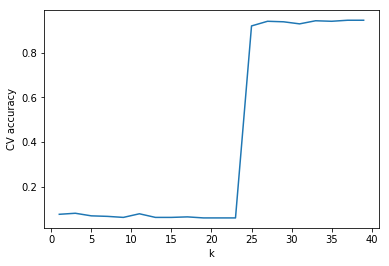

('El parametro k optimo es:', 37)


In [210]:
#Realizar la media de los scores obtenidos

k_mean_scores=[]

#Recorrer el array
for i in range(len(k_scores)):
    contador=0
    for j in range(len(cv_k_scores)):
        contador+=cv_k_scores[j][i]
        final_score=contador/len(cv_k_scores) #Media aritmetica
        
    k_mean_scores.append(final_score) 
print(k_mean_scores)
#Visualizacion
plt.plot(k_values, k_mean_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

k_optimo = np.array(k_values)[k_mean_scores.index(np.array(k_mean_scores).max())]
print('El parametro k optimo es:', k_optimo)


        
    

In [214]:
display(X_train_transformed)
train_cross_val=X_train_transformed[X_train_transformed['IdPaciente']!='1']


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,IdPaciente,index_list
0,0.003929,-0.285412,-3.092816,0.385244,0.899443,0.505810,0.735936,0.0,0.354915,-0.453082,...,2.150301,0.647440,0.745792,-1.253566,-0.707107,0.0,0.499017,-0.906944,0,1
1,2.652000,0.852724,0.920112,-1.370952,-1.379848,0.294485,-0.210033,0.0,-1.450707,-0.077269,...,-0.645247,0.468743,0.321416,0.797724,1.414214,0.0,-2.821991,0.688732,0,2
2,0.818720,-1.044169,0.470664,0.591855,-0.881253,0.050649,0.105290,0.0,1.257726,1.934986,...,-0.645247,0.878798,-0.604903,0.797724,1.414214,0.0,0.498532,-1.050145,0,3
3,0.343426,-0.285412,0.470664,0.798466,0.899443,0.538322,-1.156001,0.0,0.354915,0.289517,...,2.150301,0.616315,0.745792,-1.253566,-0.707107,0.0,0.499017,0.136382,0,4
4,0.818720,0.852724,0.647233,-0.776944,-0.062133,0.278230,-0.683017,0.0,0.219493,0.348283,...,-0.645247,-0.473558,-1.722896,-1.253566,-0.707107,0.0,0.499017,0.095468,0,5
5,2.652000,0.852724,0.920112,-1.370952,-1.379848,0.294485,-0.210033,0.0,-1.450707,-0.004317,...,-0.645247,0.171236,0.321416,0.797724,1.414214,0.0,-2.821991,0.852391,0,6
6,0.343426,-1.802927,0.021217,1.314995,1.350315,0.294485,-0.840678,0.0,-1.450707,-0.778506,...,-0.645247,0.679579,0.321416,0.797724,1.414214,0.0,-2.821991,0.013638,0,7
7,-0.742962,0.852724,0.390406,1.418300,0.614531,0.180695,-0.446525,0.0,-0.096491,-0.111631,...,-0.645247,-0.369111,0.886823,0.797724,-0.707107,0.0,0.498775,-0.579626,0,8
8,-0.675063,0.852724,2.525284,2.296398,-0.596342,0.392020,-0.683017,0.0,0.454224,0.121612,...,-0.645247,2.421227,-0.812603,0.797724,1.414214,0.0,0.498775,-0.375052,0,9
9,-0.675063,0.473345,-0.155352,0.488550,0.400848,-1.769998,0.893597,0.0,-0.322193,-1.414720,...,-0.645247,-0.176839,0.808615,-1.253566,1.414214,0.0,0.498775,0.565987,0,10


## Parámetros min_samples_leaf y max_depth

# Construcción de modelos

## KNN

In [245]:
#Generamos el modelo
y_train_neigh=y_train.iloc[:,0]
X_train_transformed_neigh= X_train_transformed.iloc[:,0:40]
X_test_transformed_neigh=X_test_transformed.iloc[:,0:40]
y_test_neigh=y_test.iloc[:,0]

neigh = KNeighborsClassifier(n_neighbors=k_optimo)
neigh.fit(X_train_transformed_neigh, y_train_neigh)
pred_neigh = neigh.predict(X_test_transformed_neigh)


In [246]:
print('Accuracy of logistic K-NN classifier on test set: {:.4f}'.format(neigh.score(X_test_transformed_neigh, y_test_neigh)))
print('Accuracy of logistic K-NN cross-validation on test set: {:.4f}'.format(np.array(k_mean_scores).max()))

Accuracy of logistic K-NN classifier on test set: 0.4931
Accuracy of logistic K-NN cross-validation on test set: 0.9444


In [248]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_neigh, pred_neigh)
print(confusion_matrix)

[[65  7]
 [66  6]]


In [249]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()
VN = float(VN)
FP = float(FP)
FN = float(FN)
VP = float(VP)

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

('La tasa de acierto del test es de:', 0.4930555555555556)
('La sensibilidad del test es de:', 0.08333333333333333)
('La especificidad de acierto es de:', 0.9027777777777778)


## Árbol de decision

# Visualización de la salida Outcome predicha

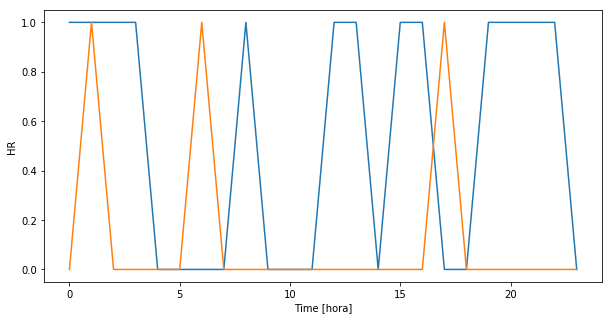

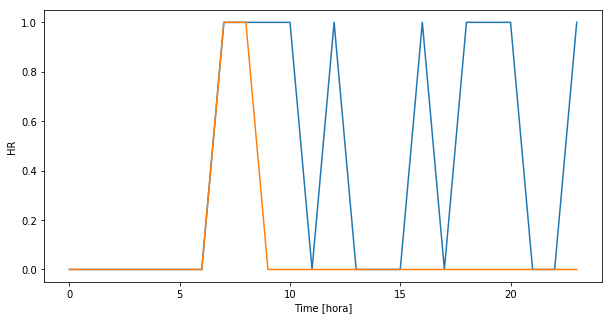

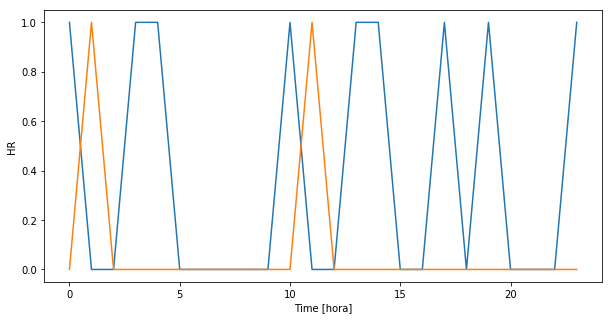

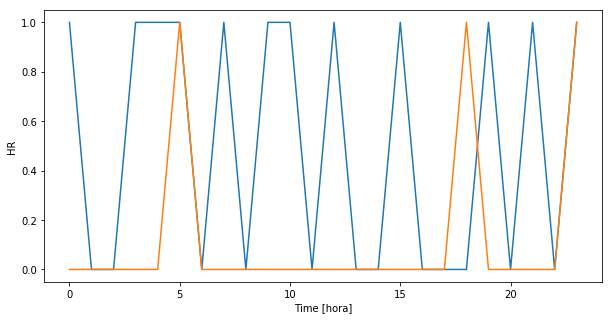

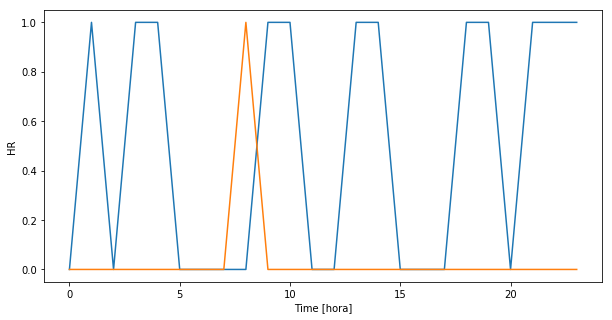

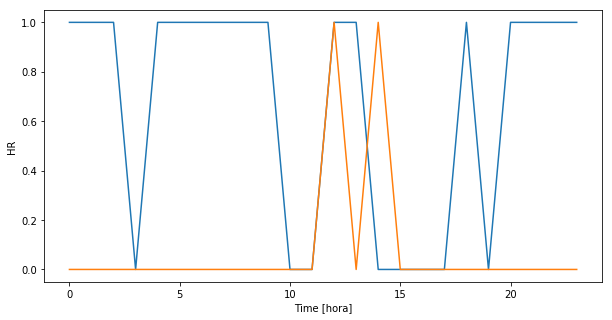

In [250]:
a=-24
b=0
for i in range(len(X_test_transformed)/24):
    a+=24
    b+=24
    paciente_real=y_test_neigh[a:b]
    paciente_predicted=pred_neigh[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real)
    plt.plot(t,paciente_predicted)
    plt.xlabel('Time [hora]')
    plt.ylabel('HR')
    
